# Iris Dataset

Taking a look at one of the well-known standard datasets : Fisher's 1936 set of measurements of three species of the iris flower.

### Sources

* https://www.kaggle.com/arshid/iris-flower-dataset - where I found the version of ./data/iris.csv that I'm using here.
* https://en.wikipedia.org/wiki/Iris_flower_data_set - a description of the dataset

```
     The data set consists of 50 samples from each of three species of Iris 
     (Iris setosa, Iris virginica and Iris versicolor). Four features were 
     measured from each sample: the length and the width of the sepals and petals, 
     in centimeters. Based on the combination of these four features, Fisher 
     developed a linear discriminant model to distinguish the species from each other.
     ... wikipedia
```

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/440px-Iris_versicolor_3.jpg'>

Jim Mahoney | Feb 3 2020

In [138]:
# python modules

from matplotlib import pyplot as plt
from typing import Union, List

import pprint
pp = pprint.PrettyPrinter(indent=4)      # see https://docs.python.org/3/library/pprint.html

## First version - DIY

First, here's a version that uses matplotlib but not pandas or numpy.

### Step 1 : get the data

In [139]:
# Read in the raw data.

csv_filename = './data/iris.csv'

# column indices (See the first header line of the csv file.
(i_sepal_length, i_sepal_width, i_petal_length, i_petal_width, i_species) = [0, 1, 2, 3, 4]

raw_lines = open(csv_filename).readlines()[1:]  # skip the first header line.

print(f"number of lines in '{csv_filename}' is {len(raw_lines)}")
raw_lines[:3]

number of lines in './data/iris.csv' is 150


['5.1,3.5,1.4,0.2,Iris-setosa\n',
 '4.9,3,1.4,0.2,Iris-setosa\n',
 '4.7,3.2,1.3,0.2,Iris-setosa\n']

In [140]:
# Define a data conversion utility routine.

def cleanup(entry: str) -> Union[float, str]:
    """ Convert entries like '5.0' to 5.0, and those 'Iris-setosa' to 'setosa' """
    entry = entry.strip()                        # remove trailing newline
    try:
        entry = float(entry)                     # convert number string to float
    except:
        pass
    try:
        entry = entry.replace('Iris-', '')       # remove 'Iris-' prefix from species
    except:
        pass
    return entry

assert cleanup('3.2') == 3.2
assert cleanup('Iris-setosa\n') == 'setosa'


In [141]:
# Process the data into a useable form.

iris_data = []
for line in raw_lines:
    iris_data.append( [cleanup(entry) for entry in line.split(',')] )

# See a sample.
iris_data[:5] + ['...'] + iris_data[-5:]       

[[5.1, 3.5, 1.4, 0.2, 'setosa'],
 [4.9, 3.0, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.3, 0.2, 'setosa'],
 [4.6, 3.1, 1.5, 0.2, 'setosa'],
 [5.0, 3.6, 1.4, 0.2, 'setosa'],
 '...',
 [6.7, 3.0, 5.2, 2.3, 'virginica'],
 [6.3, 2.5, 5.0, 1.9, 'virginica'],
 [6.5, 3.0, 5.2, 2.0, 'virginica'],
 [6.2, 3.4, 5.4, 2.3, 'virginica'],
 [5.9, 3.0, 5.1, 1.8, 'virginica']]

### Step 2 : massage the data a bit

Just for fun, I'm going to look at (length - width)/length for the sepals and petals,
perhaps as a way to find something like how far away it is from being square.

I'll call this "skew". 

I should end up with 6 sets of 50 numbers, mostly in the 0 to 1 range,
one set for each of the three species and two flower parts (which I'll call "leafs" even though they aren't).

In [142]:

def is_species(row, specie: str) -> bool:
    """ True if this row matches this specie """
    # This will help me get the data from just one of the three species.
    return row[i_species] == specie

assert is_species(iris_data[0], 'setosa')

def calc_skew(length: float, width: float) -> float:
    """ My own mangling of the data : (length - width)/length """
    return (length - width) / length

species = ('setosa', 'virginica', 'versicolor')
leaves = ('sepal', 'petal')
indeces_lengthwidth = {'sepal': (0, 1), 'petal': (2, 3)}

# Now put the numbers into a data structe that will let is get the six lists of numbers,
# which I've decided will be a dict of dicts of lists : 
#
#      species   leaf       (length-width)/length 
# skew['setosa']['sepal'] = [0.2, 0.31, 0.14, ...]     # 50 values

skew = {}             
for specie in species:
    skew[specie] = {}
    for leaf in leaves:
        (i_length, i_width) = indeces_lengthwidth[leaf]
        skew[specie][leaf] = [calc_skew(row[i_length], row[i_width]) 
                              for row in iris_data 
                              if is_species(row, name)]


In [143]:
# Let's see if what I just made looks like what I think it is.

skew.keys()

dict_keys(['setosa', 'virginica', 'versicolor'])

In [144]:
skew['setosa'].keys()

dict_keys(['sepal', 'petal'])

In [145]:
skew['setosa']['petal'][0:5]

[0.7021276595744681,
 0.6666666666666666,
 0.6938775510204082,
 0.675,
 0.6739130434782609]

In [146]:
len(skew['setosa']['petal'])

50

### Step 3 : make some pictures 

In [147]:
# To start, I'll just grab one of the six skew lists.

specie = 'setosa'
leaf = 'petal'

xs = skew[specie][leaf]                # "xs" is the plural of "x" ... a Haskell convention. :)
print([f'{x:.4f}' for x in xs])        # ... four decimal places

['0.7021', '0.6667', '0.6939', '0.6750', '0.6739', '0.7111', '0.6596', '0.6970', '0.7174', '0.6410', '0.7143', '0.6429', '0.7500', '0.7021', '0.6389', '0.6818', '0.6667', '0.7561', '0.6667', '0.7179', '0.6250', '0.6750', '0.6939', '0.7447', '0.6977', '0.6818', '0.7083', '0.6600', '0.6667', '0.7143', '0.7105', '0.7297', '0.6923', '0.6863', '0.6667', '0.6444', '0.6809', '0.7045', '0.6829', '0.6750', '0.7273', '0.6957', '0.7000', '0.6970', '0.6905', '0.7143', '0.6905', '0.6977', '0.6333', '0.6829']


In [148]:
# Count how many of these numbers fall into each bin.

n_bins = 15

(bin_low, bin_hi) = (min(xs), max(xs))
bin_size = (bin_hi - bin_low)/n_bins
bin_centers = [bin_low + (n + 0.5) * bin_size for n in range(n_bins)]

counts = [0] * n_bins
for i in range(n_bins):
    for x in xs:
        if bin_low + i * bin_size <= x <= bin_low + (1+i) * bin_size:
            counts[i] += 1

# Does this look OK ?
counts, sum(counts)

([2, 2, 2, 1, 6, 4, 5, 6, 8, 4, 5, 2, 0, 1, 2], 50)

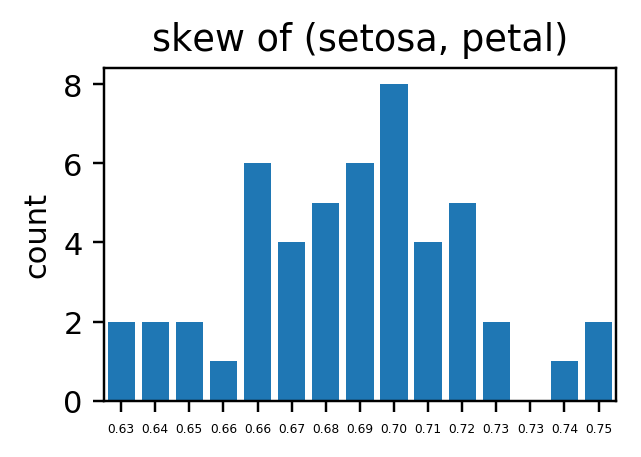

In [149]:
# A bar graph !  (after a bit of trial and error for sizes and what-not)

plt.figure(dpi=220, figsize=(3, 2))   # init & set size of the new plot (3" x 2", 220dpi)

bin_labels = [f'{bin:.2f}' for bin in bin_centers]

plt.bar(bin_centers, counts, 0.8 * bin_size) 

plt.title(f"skew of ({specie}, {leaf})")
plt.ylabel("count")
plt.xticks(bin_centers, bin_labels, fontsize=4)
plt.xlim(bin_low, bin_hi)

plt.show ()

#### TO DO :

Either

* loop this over the other species & leafs, or 
* put multiple version on the same plot in different colors


In [150]:
# How about a scatter plot ?

# Here are the numbers for the other flower part, for the same specie

leaf2 = 'sepal'

ys = skew[specie][leaf2]
print([f'{y:.4f}' for y in ys])        # ... four decimal places


['0.5429', '0.5000', '0.5507', '0.5818', '0.5692', '0.5088', '0.4762', '0.5102', '0.5606', '0.4808', '0.6000', '0.4915', '0.6333', '0.5246', '0.4821', '0.5373', '0.4643', '0.5345', '0.6452', '0.5536', '0.4576', '0.5410', '0.6032', '0.5410', '0.5469', '0.5455', '0.5882', '0.5522', '0.5167', '0.5439', '0.5636', '0.5636', '0.5345', '0.5500', '0.4444', '0.4333', '0.5373', '0.6349', '0.4643', '0.5455', '0.5273', '0.5082', '0.5517', '0.5400', '0.5179', '0.4737', '0.4912', '0.5323', '0.5098', '0.5088']


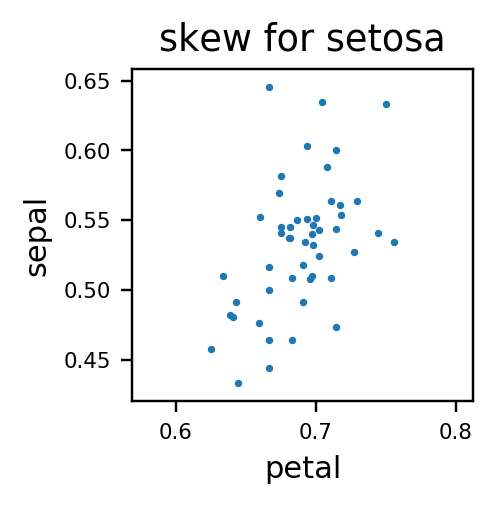

In [151]:
plt.figure(dpi=220, figsize=(2, 2))

plt.xticks(fontsize=7)   # Size set by trial and error.
plt.yticks(fontsize=7)   # (The changes from the last graph are still in effect.)

plt.scatter(xs, ys, s=2)    # s is marker size ; scalar or array (size of each one)

plt.title(f"skew for {specie}")
plt.xlabel(leaf)
plt.ylabel(leaf2)

plt.axis("equal")                     # set distance scale on the two axes the same

## The two types of flower parts have different skewness; this puts them on the same scale.
# plt.xlim(0.4, 0.8)
# plt.ylim(0.4, 0.8)

plt.show()



#### TODO :

Put all three species on the same plot, with different colors.



## Second version - with pandas & numpy

Try the same thing with pandas and numpy?

Pandas :

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html

Numpy :
* np.array() # .... then just add, multiply, etc


In [152]:
# Two new libraries :

import pandas as pd
import numpy as np

In [153]:
iris = pd.read_csv(csv_filename)

In [154]:
iris

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0           1.4          0.1     Iris-setosa
13            4.3          3.0           1.1          0.1     Iris-setosa
14            5.8          4.0           1.2          0.2     Iris-setosa
15            5.7          4.4           1.5          0.4     Iris-setosa
16            5.4          3.9           1.3          0.4     Iris-setosa
17            5.1          3.5           1.4          0.3     Iris-setosa
18            5.7          3.8           1.7          0.3     Iris-setosa
19            5.1          3.8           1.5          0.3     Iris-setosa
20            5.4          3.4           1.7          0.2     Iris-setosa
21            5.1          3.7           1.5          0.4     Iris-setosa
22            4.6          3.6           1.0          0.2     Iris-setosa
23            5.1          3.3           1.7          0.5     Iris-setosa
24            4.8          3.4           1.9          0.2     Iris-setosa
25            5.0          3.0           1.6          0.2     Iris-setosa
26            5.0          3.4           1.6          0.4     Iris-setosa
27            5.2          3.5           1.5          0.2     Iris-setosa
28            5.2          3.4           1.4          0.2     Iris-setosa
29            4.7          3.2           1.6          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
120           6.9          3.2           5.7          2.3  Iris-virginica
121           5.6          2.8           4.9          2.0  Iris-virginica
122           7.7          2.8           6.7          2.0  Iris-virginica
123           6.3          2.7           4.9          1.8  Iris-virginica
124           6.7          3.3           5.7          2.1  Iris-virginica
125           7.2          3.2           6.0          1.8  Iris-virginica
126           6.2          2.8           4.8          1.8  Iris-virginica
127           6.1          3.0           4.9          1.8  Iris-virginica
128           6.4          2.8           5.6          2.1  Iris-virginica
129           7.2          3.0           5.8          1.6  Iris-virginica
130           7.4          2.8           6.1          1.9  Iris-virginica
131           7.9          3.8           6.4          2.0  Iris-virginica
132           6.4          2.8           5.6          2.2  Iris-virginica
133           6.3          2.8           5.1          1.5  Iris-virginica
134           6.1          2.6           5.6          1.4  Iris-virginica
135           7.7          3.0           6.1          2.3  Iris-virginica
136           6.3          3.4           5.6          2.4  Iris-virginica
137           6.4          3.1           5.5          1.8  Iris-virginica
138           6.0          3.0           4.8          1.8  Iris-virginica
139           6.9          3.1           5.4          2.1  Iris-virginica
140           6.7          3.1           5.6          2.4  Iris-virginica
141           6.9          3.1           5.1          2.3  Iris-virginica
142      

In [165]:
a = 2

In [169]:
iris['species'] == 'Iris-virginica'

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120     True
121     True
122     True
123     True
124     True
125     True
126     True
127     True
128     True
129     True
130     True
131     True
132     True
133     True
134     True
135     True
136     True
137     True
138     True
139     True
140     True
141     True
142     True
143     True
144     True
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [156]:
# We can extract one of the species like this
x = iris['sepal_length'][iris['species'] == 'Iris-virginica']

In [157]:
type(x)

pandas.core.series.Series

In [158]:
# And we can simple arithmetic on the whole collection at once.
x * 2

100    12.6
101    11.6
102    14.2
103    12.6
104    13.0
105    15.2
106     9.8
107    14.6
108    13.4
109    14.4
110    13.0
111    12.8
112    13.6
113    11.4
114    11.6
115    12.8
116    13.0
117    15.4
118    15.4
119    12.0
120    13.8
121    11.2
122    15.4
123    12.6
124    13.4
125    14.4
126    12.4
127    12.2
128    12.8
129    14.4
130    14.8
131    15.8
132    12.8
133    12.6
134    12.2
135    15.4
136    12.6
137    12.8
138    12.0
139    13.8
140    13.4
141    13.8
142    11.6
143    13.6
144    13.4
145    13.4
146    12.6
147    13.0
148    12.4
149    11.8
Name: sepal_length, dtype: float64

In [159]:
# To work with one species at a time,
# we could make a new data frame for each ...
# or write a function that would apply a filter like that.

In [160]:
# Here's an example of a manipulation on the whole thing, all species.

iris['sepal_skew'] = (iris['sepal_length'] - iris['sepal_width'])/iris['sepal_length']
iris['petal_skew'] = (iris['petal_length'] - iris['petal_width'])/iris['petal_length']

In [161]:
iris

sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
5             5.4          3.9           1.7          0.4     Iris-setosa   
6             4.6          3.4           1.4          0.3     Iris-setosa   
7             5.0          3.4           1.5          0.2     Iris-setosa   
8             4.4          2.9           1.4          0.2     Iris-setosa   
9             4.9          3.1           1.5          0.1     Iris-setosa   
10            5.4          3.7           1.5          0.2     Iris-setosa   
11            4.8          3.4           1.6          0.2     Iris-setosa   
12            4.8          3.0           1.4          0.1     Iris-setosa   
13            4.3          3.0           1.1          0.1     Iris-setosa   
14            5.8          4.0           1.2          0.2     Iris-setosa   
15            5.7          4.4           1.5          0.4     Iris-setosa   
16            5.4          3.9           1.3          0.4     Iris-setosa   
17            5.1          3.5           1.4          0.3     Iris-setosa   
18            5.7          3.8           1.7          0.3     Iris-setosa   
19            5.1          3.8           1.5          0.3     Iris-setosa   
20            5.4          3.4           1.7          0.2     Iris-setosa   
21            5.1          3.7           1.5          0.4     Iris-setosa   
22            4.6          3.6           1.0          0.2     Iris-setosa   
23            5.1          3.3           1.7          0.5     Iris-setosa   
24            4.8          3.4           1.9          0.2     Iris-setosa   
25            5.0          3.0           1.6          0.2     Iris-setosa   
26            5.0          3.4           1.6          0.4     Iris-setosa   
27            5.2          3.5           1.5          0.2     Iris-setosa   
28            5.2          3.4           1.4          0.2     Iris-setosa   
29            4.7          3.2           1.6          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
120           6.9          3.2           5.7          2.3  Iris-virginica   
121           5.6          2.8           4.9          2.0  Iris-virginica   
122           7.7          2.8           6.7          2.0  Iris-virginica   
123           6.3          2.7           4.9          1.8  Iris-virginica   
124           6.7          3.3           5.7          2.1  Iris-virginica   
125           7.2          3.2           6.0          1.8  Iris-virginica   
126           6.2          2.8           4.8          1.8  Iris-virginica   
127           6.1          3.0           4.9          1.8  Iris-virginica   
128           6.4          2.8           5.6          2.1  Iris-virginica   
129           7.2          3.0           5.8          1.6  Iris-virginica   
130           7.4          2.8           6.1          1.9  Iris-virginica   
131           7.9          3.8           6.4          2.0  Iris-virginica   
132           6.4          2.8           5.6          2.2  Iris-virginica   
133           6.3          2.8           5.1          1.5  Iris-virginica   
134           6.1          2.6           5.6          1.4  Iris-virginica   
135           7.7          3.0           6.1          2.3  Iris-virginica   
136           6.3          3.4           5.6          2.4  Iris-virginica   
137           6.4          3.1           5.5          1.8  Iris-virginica   
138           6.0          3.0           4.8          1.8  Iris-virginica   
139           6.9          3.1           5.4          2.1  Iris-virginica   
1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0357f5aa58>,
      dtype=object)

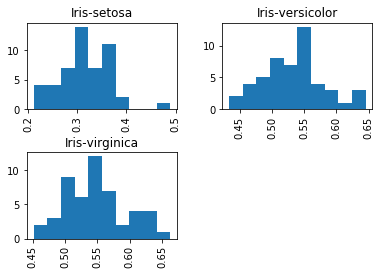

In [171]:
iris.hist(column='sepal_skew', by='species')   # This is all three species ... it would take a bit more work to pull out one at a time.

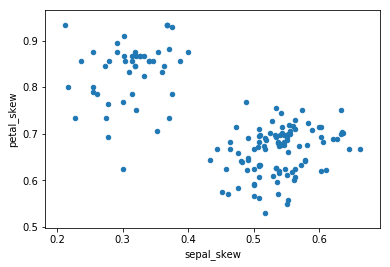

In [173]:
iris.plot.scatter('sepal_skew', 'petal_skew')   # again, thish is all three species

In [164]:
# suggestive ... next step would be to use different colors for different species.

## thoughts 

Pandas (and numpy, though I didn't use it explicitly here) are very powerful,
and let us do this sort of work more quickly.

However, they are also more complicated, and sometimes that complexity can
get in the way of what you're trying to do. It's another system and API to learn,
on top of all the rest.

Sometimes, even with all of pandas bells and whistles, you want to do something
that isn't already built-in ... and then you start falling back on the "from scratch"
methods. Which is in part why we're looking at them.
